# Avaliação e Previsão de Agentes e Fenômenos que Mais Causam Impactos Socioeconômicos na Região Sudeste do Brasil

# **0.** Instalação das Dependências
<a id="instalar"></a>

In [368]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1.** Importação das Bibliotecas
<a id="bibliotecas"></a>

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# **2.** Importação das Bases de Dados
<a id="bases"></a>

In [370]:
rend_trabalho = pd.read_csv('../data/raw/Indic_Geo_Rend.csv', comment=None , header=1)
ind_trabalho = pd.read_csv('../data/raw/Indic_Geo.csv', comment=None , header=1)
gini = pd.read_csv('../data/raw/Indice_Gini_Geo.csv', comment=None , header=1)
nivel_instrucao = pd.read_csv('../data/raw/Instr_Geo.csv', comment=None , header=1)
populacao = pd.read_csv('../data/raw/Pop_Geo.csv', comment=None , header=1)
saneamento = pd.read_csv('../data/raw/Sane_Geo_pes.csv', comment=None , header=1)
analfabetos = pd.read_csv('../data/raw/TaxaAnalf_Geo.csv', comment=None , header=1)
mortalidade = pd.read_csv('../data/raw/TaxaMort_Geo.csv', comment=None , header=1)
plano = pd.read_csv('../data/raw/Benef_Plano_Geo.csv', comment=None , header=1)
leitos = pd.read_csv('../data/raw/Leit_IntTot_Geo.csv', comment=None , header=1)
ocupacao = pd.read_csv('../data/raw/CondOcup_Geo.csv', comment=None , header=1)
idh = pd.read_csv('../data/raw/Ind_Desen_Hum.csv', comment=None , header=1)
pib = pd.read_csv('../data/raw/Prod_Int_Bruto.csv', comment=None , header=1)

## Visualização das Bases de Dados

In [371]:
display(rend_trabalho)

,Estado,Ano,Rendimento médio real habitual do trabalho principal(R$/mês),Rendimento médio real habitual de todos os trabalhos(R$/mês),Rendimento-hora médio real habitual do trabalho principal(R$/hora),Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t
0,Rondônia,2023,2636,2695,18.0,18.0
1,Acre,2023,2338,2358,15.0,15.0
2,Amazonas,2023,2308,2367,14.4,14.4
3,Roraima,2023,2701,2791,16.7,16.6
4,Pará,2023,2176,2265,13.8,13.8
...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,3110,3211,18.9,18.9
131,Mato Grosso do Sul,2019,2910,3011,18.2,18.2
132,Mato Grosso,2019,2781,2846,17.4,17.2
133,Goiás,2019,2530,2597,15.2,15.2


In [372]:
display(ind_trabalho)

,Estado,Ano,População em idade de trabalhar,População na força de trabalho,População ocupada,População ocupada em trabalhos formais,População desocupada,População na força de trabalho potencial,População subutilizada,Taxa de participação,Nível de ocupação,Taxa de formalização,Taxa de desocupação,Taxa composta de subutilização
0,Rondônia,2023,1496,851,824,486,27,19.00,56.0,56.9,55.1,59.0,3.2,6.5
1,Acre,2023,691,342,316,152,25,36.00,68.0,49.4,45.7,48.0,7.5,18.0
2,Amazonas,2023,3182,1946,1752,703,194,139.00,424.0,61.2,55.1,40.1,9.9,20.3
3,Roraima,2023,449,280,262,120,18,13.38,62.5,58.4,45.7,6.6,12.8,NaN
4,Pará,2023,6862,4194,3869,1449,325,476.00,1123.0,61.1,56.4,37.4,7.7,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,9396,6280,5788,4045,492,219.00,1011.0,66.8,61.6,69.9,7.8,15.6
131,Mato Grosso do Sul,2019,2113,1460,1345,778,116,88.00,276.0,69.1,63.6,57.8,7.9,17.8
132,Mato Grosso,2019,2649,1845,1694,1006,151,85.00,309.0,69.6,63.9,59.4,8.2,16.0
133,Goiás,2019,5643,3817,3409,1933,408,179.00,731.0,67.6,60.4,56.7,10.7,18.3


In [373]:
display(gini)

,Estado,Ano,Índice Gini
0,Rondônia,2023,0.455
1,Acre,2023,0.511
2,Amazonas,2023,0.512
3,Roraima,2023,0.520
4,Pará,2023,0.501
...,...,...,...
131,Rio Grande do Sul,2019,0.482
132,Mato Grosso do Sul,2019,0.483
133,Mato Grosso,2019,0.454
134,Goiás,2019,0.460


In [374]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [375]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [376]:
display(populacao)

,Estado,Ano,População
0,Acre,2019,865
1,Alagoas,2019,3330
2,Amazonas,2019,3983
3,Amapá,2019,838
4,Bahia,2019,14854
...,...,...,...
130,Rio Grande do Sul,2023,11206
131,Santa Catarina,2023,7913
132,Sergipe,2023,2282
133,São Paulo,2023,45846


In [377]:
display(saneamento)

,Estado,Ano,Saneamento Basico Total(1 000 pessoas),Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)
0,Rondônia,2019,1841.0,22.7
1,Acre,2023,914.0,37.8
2,Amazonas,2023,4221.0,43.6
3,Roraima,2023,610.0,54.6
4,Pará,2023,8902.0,18.4
...,...,...,...,...
130,Rio Grande do Sul,2019,11359.0,68.4
131,Mato Grosso do Sul,2019,2709.0,49.9
132,Mato Grosso,2019,3431.0,36.9
133,Goiás,2019,7021.0,59.6


In [378]:
display(analfabetos)

,Estado,Ano,Taxa de Analfabetismo
0,Rondônia,2023,5.1
1,Acre,2023,9.4
2,Amazonas,2023,5.1
3,Roraima,2023,4.2
4,Pará,2023,6.9
...,...,...,...
130,Rio Grande do Sul,2019,2.4
131,Mato Grosso do Sul,2019,4.6
132,Mato Grosso,2019,5.6
133,Goiás,2019,4.6


In [379]:
display(mortalidade)

,Estado,Ano,Taxa Total Mortalidade,0 a 14 anos,15 a 29 anos,30 a 44 anos,45 a 59 anos,60 anos ou mais,60 a 69 anos,70 anos ou mais
0,Rondônia,2023,5.73,1.10,1.48,2.31,5.45,29.98,14.45,53.54
1,Acre,2023,4.78,1.54,1.32,2.10,5.11,30.23,13.93,52.75
2,Amazonas,2023,4.80,1.53,1.60,2.42,5.34,29.47,14.13,52.66
3,Roraima,2023,4.74,2.52,1.57,2.46,5.75,28.21,14.66,49.97
4,Pará,2023,5.08,1.33,1.44,2.26,4.94,28.61,13.43,49.27
...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,7.97,0.94,1.13,1.95,5.66,33.60,15.17,56.90
131,Mato Grosso do Sul,2019,6.06,1.08,1.22,2.07,5.81,32.07,14.83,55.31
132,Mato Grosso,2019,5.16,1.26,1.37,2.15,5.47,29.16,14.62,51.07
133,Goiás,2019,5.88,1.16,1.46,2.14,5.33,30.99,14.38,53.79


In [380]:
display(plano)

,Estado,T1 2019,T2 2019,T3 2019,T4 2019,T1 2020,T2 2020,T3 2020,T4 2020,T1 2021,...,T3 2021,T4 2021,T1 2022,T2 2022,T3 2022,T4 2022,T1 2023,T2 2023,T3 2023,T4 2023
0,Rondônia,99941,104567,104202,103809,105345,107436,106437,112245,109397,...,109470,109143,110414,111001,112095,112299,113119,115597,116071,120689
1,Acre,15112,14374,14409,15464,15573,15018,15544,15774,15552,...,16825,16934,17300,17219,17282,17279,17062,17349,18595,19973
2,Amazonas,400005,409042,415795,430642,439485,421017,439357,457801,459628,...,462127,490663,497536,505700,515848,509477,542588,549525,553702,558178
3,Roraima,9213,9476,9812,10665,10803,10289,10805,11289,10825,...,10972,10730,10902,11118,11045,11491,11372,11631,11768,11691
4,Pará,410263,417289,414379,426214,428410,418499,440902,457614,460211,...,505659,506517,499187,514505,508455,509878,510563,518613,525875,538871
5,Amapá,43889,43420,44229,44497,44445,44021,45834,48269,48598,...,49644,49510,48457,48235,50965,52097,51416,50313,47846,48172
6,Tocantins,49181,120511,121949,126251,126445,111537,62062,63728,63182,...,130005,130278,129395,119472,120848,121521,122139,121469,124778,127249
7,Maranhão,197051,194141,195059,201519,206131,199345,214092,223894,224574,...,240966,245027,252267,265950,272590,281604,287596,293209,314189,324883
8,Piauí,84202,84390,85628,91800,96288,89132,93756,105918,108355,...,120771,128841,130013,138822,145142,151008,157527,169434,179582,191980
9,Ceará,951107,964397,944408,966518,992173,958343,979538,996734,1022691,...,1020264,1048814,1051472,1088977,1126009,1157246,1174417,1194993,1222830,1321364


In [381]:
display(leitos)

,Estado,Ano,Número mensal médio de leitos de internação (total)
0,Rondônia,2019,4477
1,Acre,2019,1469
2,Amazonas,2019,5701
3,Roraima,2019,1071
4,Pará,2019,14412
...,...,...,...
130,Rio Grande do Sul,2023,29615
131,Mato Grosso do Sul,2023,5907
132,Mato Grosso,2023,7533
133,Goiás,2023,18728


In [382]:
display(ocupacao)

,Estado,Ano,Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas),Domicílio Próprio - já pago,Domicílio Próprio - pagando,Domicílio Alugado,Domicílio Cedido por empregador,Domicílio Cedido por familiar,Domicílio Cedido de outra forma,Outra Forma
0,Rondônia,2023,1841.0,68.8,1.5,19.9,2.0,6.2,1.5,0.1
1,Acre,2023,914.0,79.8,0.7,10.2,2.0,6.4,0.6,0.3
2,Amazonas,2023,4221.0,73.8,1.9,15.5,0.7,7.2,0.7,0.1
3,Roraima,2023,610.0,59.0,2.8,26.1,2.7,7.7,1.7,0.1
4,Pará,2023,8902.0,74.1,3.0,13.5,1.4,6.8,0.8,0.3
...,...,...,...,...,...,...,...,...,...,...
131,Rio Grande do Sul,2019,11359.0,68.6,8.9,15.2,1.0,5.2,0.8,0.4
132,Mato Grosso do Sul,2019,2709.0,51.9,11.5,21.8,5.9,7.8,0.8,0.2
133,Mato Grosso,2019,3431.0,60.0,6.1,23.0,5.2,4.7,0.9,0.3
134,Goiás,2019,7021.0,54.5,11.1,23.1,3.1,7.2,0.7,0.4


In [383]:
display(idh)

,Estado,Ano,IDH
0,Acre,2019,0.739
1,Alagoas,2019,0.687
2,Amazonas,2019,0.726
3,Amapá,2019,0.737
4,Bahia,2019,0.718
...,...,...,...
130,Rio Grande do Sul,2023,NaN
131,Santa Catarina,2023,NaN
132,Sergipe,2023,NaN
133,São Paulo,2023,NaN


In [384]:
display(pib)

,Estado,Ano,PIB
0,Acre,2019,15630017.0
1,Alagoas,2019,58963729.0
2,Amazonas,2019,108181091.0
3,Amapá,2019,17496661.0
4,Bahia,2019,293240504.0
...,...,...,...
125,Rio Grande do Sul,2023,NaN
126,Santa Catarina,2023,NaN
127,Sergipe,2023,NaN
128,São Paulo,2023,NaN


# **3.** Análise dos Dados antes do Tratamento
<a id="analise1"></a>

## Verificação do Tamanho das Colunas e Linhas das Bases de Dados

In [385]:
rend_trabalho.shape

(135, 6)

In [386]:
ind_trabalho.shape

(135, 14)

In [387]:
gini.shape

(136, 3)

In [388]:
nivel_instrucao.shape

(135, 7)

In [389]:
populacao.shape

(135, 3)

In [390]:
saneamento.shape

(135, 4)

In [391]:
analfabetos.shape

(135, 3)

In [392]:
mortalidade.shape

(135, 10)

In [393]:
plano.shape

(27, 21)

In [394]:
leitos.shape

(135, 3)

In [395]:
ocupacao.shape

(136, 10)

In [396]:
idh.shape

(135, 3)

In [397]:
pib.shape

(130, 3)

Análise das Bases de Dados: Tamanho das colunas e linhas. Informações de todos os estados do Brasil. Tabela de plano possui um volume maior de informações do que as outras

## Verificação de Valores Nulos nas Bases de Dados

In [398]:
rend_trabalho.isnull().sum()

Estado                                                                  0
Ano                                                                     0
Rendimento médio real habitual do trabalho principal(R$/mês)            0
Rendimento médio real habitual de todos os trabalhos(R$/mês)            0
Rendimento-hora médio real habitual do trabalho principal(R$/hora)      0
Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t    0
dtype: int64

In [399]:
ind_trabalho.isnull().sum()

Estado                                       0
Ano                                          0
População em idade de trabalhar              0
População na força de trabalho               0
População ocupada                            0
População ocupada em trabalhos formais       0
População desocupada                         0
População na força de trabalho potencial     0
População subutilizada                       0
Taxa de participação                         0
Nível de ocupação                            0
Taxa de formalização                         0
Taxa de desocupação                          0
Taxa composta de subutilização              29
dtype: int64

In [400]:
(ind_trabalho.isnull().sum() / len(ind_trabalho)) * 100

Estado                                       0.000000
Ano                                          0.000000
População em idade de trabalhar              0.000000
População na força de trabalho               0.000000
População ocupada                            0.000000
População ocupada em trabalhos formais       0.000000
População desocupada                         0.000000
População na força de trabalho potencial     0.000000
População subutilizada                       0.000000
Taxa de participação                         0.000000
Nível de ocupação                            0.000000
Taxa de formalização                         0.000000
Taxa de desocupação                          0.000000
Taxa composta de subutilização              21.481481
dtype: float64

In [401]:
gini.isnull().sum()

Estado         0
Ano            0
Índice Gini    0
dtype: int64

In [402]:
nivel_instrucao.isnull().sum()

Estado                                             0
Ano                                                0
Total Pessoas Ocupadas(1 000 pessoas)              0
Sem instrução ou fundamental incompleto            0
Ensino fundamental completo ou médio incompleto    0
Ensino médio completo ou superior incompleto       0
Ensino superior completo                           0
dtype: int64

In [403]:
populacao.isnull().sum()

Estado       0
Ano          0
População    0
dtype: int64

In [404]:
saneamento.isnull().sum()

Estado                                                                                   0
Ano                                                                                      0
Saneamento Basico Total(1 000 pessoas)                                                  54
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    54
dtype: int64

In [405]:
(saneamento.isnull().sum() / len(saneamento)) * 100

Estado                                                                                   0.0
Ano                                                                                      0.0
Saneamento Basico Total(1 000 pessoas)                                                  40.0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    40.0
dtype: float64

In [406]:
analfabetos.isnull().sum()

Estado                    0
Ano                       0
Taxa de Analfabetismo    54
dtype: int64

In [407]:
(analfabetos.isnull().sum() / len(analfabetos)) * 100

Estado                    0.0
Ano                       0.0
Taxa de Analfabetismo    40.0
dtype: float64

In [408]:
mortalidade.isnull().sum()

Estado                    0
Ano                       0
Taxa Total Mortalidade    0
0 a 14 anos               0
15 a 29 anos              0
30 a 44 anos              0
45 a 59 anos              0
60 anos ou mais           0
60 a 69 anos              0
70 anos ou mais           0
dtype: int64

In [409]:
plano.isnull().sum()

Estado     0
T1 2019    0
T2 2019    0
T3 2019    0
T4 2019    0
T1 2020    0
T2 2020    0
T3 2020    0
T4 2020    0
T1 2021    0
T2 2021    0
T3 2021    0
T4 2021    0
T1 2022    0
T2 2022    0
T3 2022    0
T4 2022    0
T1 2023    0
T2 2023    0
T3 2023    0
T4 2023    0
dtype: int64

In [410]:
leitos.isnull().sum()

Estado                                                 0
Ano                                                    0
Número mensal médio de leitos de internação (total)    0
dtype: int64

In [411]:
ocupacao.isnull().sum()

Estado                                                                0
Ano                                                                   0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    54
Domicílio Próprio - já pago                                          54
Domicílio Próprio - pagando                                          54
Domicílio Alugado                                                    54
Domicílio Cedido por empregador                                      54
Domicílio Cedido por familiar                                        54
Domicílio Cedido de outra forma                                      54
Outra Forma                                                          57
dtype: int64

In [412]:
(ocupacao.isnull().sum() / len(ocupacao)) * 100

Estado                                                                0.000000
Ano                                                                   0.000000
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    39.705882
Domicílio Próprio - já pago                                          39.705882
Domicílio Próprio - pagando                                          39.705882
Domicílio Alugado                                                    39.705882
Domicílio Cedido por empregador                                      39.705882
Domicílio Cedido por familiar                                        39.705882
Domicílio Cedido de outra forma                                      39.705882
Outra Forma                                                          41.911765
dtype: float64

In [413]:
idh.isnull().sum()

Estado     0
Ano        0
IDH       54
dtype: int64

In [414]:
(idh.isnull().sum() / len(idh)) * 100

Estado     0.0
Ano        0.0
IDH       40.0
dtype: float64

In [415]:
pib.isnull().sum()

Estado     0
Ano        0
PIB       26
dtype: int64

In [416]:
(pib.isnull().sum() / len(pib)) * 100

Estado     0.0
Ano        0.0
PIB       20.0
dtype: float64

Análise dos Dados: 
ind trabalho, 21% dados faltantes na coluna
saneamento, 40% dados faltantes em cada uma das 2 colunas
analfabetos, 40% dados faltantes em cada uma das 2 colunas
ocupação, aproximadamente 40% dados faltantes em cada uma das 8 colunas
idh, 40% dados faltantes na coluna
pib, 20% dados faltantes na coluna


## Visualização dos Tipos de Dados em Cada Base

In [417]:
rend_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Estado                                                               135 non-null    object 
 1   Ano                                                                  135 non-null    int64  
 2   Rendimento médio real habitual do trabalho principal(R$/mês)         135 non-null    int64  
 3   Rendimento médio real habitual de todos os trabalhos(R$/mês)         135 non-null    int64  
 4   Rendimento-hora médio real habitual do trabalho principal(R$/hora)   135 non-null    float64
 5   Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)	  135 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 6.5+ KB


In [418]:
ind_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado                                    135 non-null    object 
 1   Ano                                       135 non-null    int64  
 2   População em idade de trabalhar           135 non-null    int64  
 3   População na força de trabalho            135 non-null    int64  
 4   População ocupada                         135 non-null    int64  
 5   População ocupada em trabalhos formais    135 non-null    int64  
 6   População desocupada                      135 non-null    int64  
 7   População na força de trabalho potencial  135 non-null    float64
 8   População subutilizada                    135 non-null    float64
 9   Taxa de participação                      135 non-null    float64
 10  Nível de ocupação                     

In [419]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estado       136 non-null    object 
 1   Ano          136 non-null    int64  
 2   Índice Gini  136 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [420]:
nivel_instrucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Estado                                           135 non-null    object 
 1   Ano                                              135 non-null    int64  
 2   Total Pessoas Ocupadas(1 000 pessoas)            135 non-null    int64  
 3   Sem instrução ou fundamental incompleto          135 non-null    float64
 4   Ensino fundamental completo ou médio incompleto  135 non-null    float64
 5   Ensino médio completo ou superior incompleto     135 non-null    float64
 6   Ensino superior completo                         135 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 7.5+ KB


In [421]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estado     135 non-null    object
 1   Ano        135 non-null    int64 
 2   População  135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [422]:
saneamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Estado                                                                                135 non-null    object 
 1   Ano                                                                                   135 non-null    int64  
 2   Saneamento Basico Total(1 000 pessoas)                                                81 non-null     float64
 3   Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)  81 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


In [423]:
analfabetos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estado                 135 non-null    object 
 1   Ano                    135 non-null    int64  
 2   Taxa de Analfabetismo  81 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [424]:
mortalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estado                  135 non-null    object 
 1   Ano                     135 non-null    object 
 2   Taxa Total Mortalidade  135 non-null    float64
 3   0 a 14 anos             135 non-null    float64
 4   15 a 29 anos            135 non-null    float64
 5   30 a 44 anos            135 non-null    float64
 6   45 a 59 anos            135 non-null    float64
 7   60 anos ou mais         135 non-null    float64
 8   60 a 69 anos            135 non-null    float64
 9   70 anos ou mais         135 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.7+ KB


In [425]:
plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Estado   27 non-null     object
 1   T1 2019  27 non-null     int64 
 2   T2 2019  27 non-null     int64 
 3   T3 2019  27 non-null     int64 
 4   T4 2019  27 non-null     int64 
 5   T1 2020  27 non-null     int64 
 6   T2 2020  27 non-null     int64 
 7   T3 2020  27 non-null     int64 
 8   T4 2020  27 non-null     int64 
 9   T1 2021  27 non-null     int64 
 10  T2 2021  27 non-null     int64 
 11  T3 2021  27 non-null     int64 
 12  T4 2021  27 non-null     int64 
 13  T1 2022  27 non-null     int64 
 14  T2 2022  27 non-null     int64 
 15  T3 2022  27 non-null     int64 
 16  T4 2022  27 non-null     int64 
 17  T1 2023  27 non-null     int64 
 18  T2 2023  27 non-null     int64 
 19  T3 2023  27 non-null     int64 
 20  T4 2023  27 non-null     int64 
dtypes: int64(20), object(1)
memory usage: 4.6

In [426]:
leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Estado                                               135 non-null    object
 1   Ano                                                  135 non-null    int64 
 2   Número mensal médio de leitos de internação (total)  135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [427]:
ocupacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Estado                                                             136 non-null    object 
 1   Ano                                                                136 non-null    int64  
 2   Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)  82 non-null     float64
 3   Domicílio Próprio - já pago                                        82 non-null     float64
 4   Domicílio Próprio - pagando                                        82 non-null     float64
 5   Domicílio Alugado                                                  82 non-null     float64
 6   Domicílio Cedido por empregador                                    82 non-null     float64
 7   Domicílio Cedido por famil

In [428]:
idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Estado  135 non-null    object 
 1   Ano     135 non-null    int64  
 2   IDH     81 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [429]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Estado  130 non-null    object 
 1   Ano     130 non-null    int64  
 2   PIB     104 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


# **4.** Tratamento dos Dados
<a id="tratamento"></a>

## Filtração dos Dados para Apenas a Região Sudeste do Brasil

In [430]:
rend_trabalho = rend_trabalho[(rend_trabalho['Estado'] == 'Minas Gerais') | (rend_trabalho['Estado'] == 'Espírito Santo') | (rend_trabalho['Estado'] == 'Rio de Janeiro') | (rend_trabalho['Estado'] == 'São Paulo')]
ind_trabalho = ind_trabalho[(ind_trabalho['Estado'] == 'Minas Gerais') | (ind_trabalho['Estado'] == 'Espírito Santo') | (ind_trabalho['Estado'] == 'Rio de Janeiro') | (ind_trabalho['Estado'] == 'São Paulo')]
gini = gini[(gini['Estado'] == 'Minas Gerais') | (gini['Estado'] == 'Espírito Santo') | (gini['Estado'] == 'Rio de Janeiro') | (gini['Estado'] == 'São Paulo')]
nivel_instrucao = nivel_instrucao[(nivel_instrucao['Estado'] == 'Minas Gerais') | (nivel_instrucao['Estado'] == 'Espírito Santo') | (nivel_instrucao['Estado'] == 'Rio de Janeiro') | (nivel_instrucao['Estado'] == 'São Paulo')]
populacao = populacao[(populacao['Estado'] == 'Minas Gerais') | (populacao['Estado'] == 'Espírito Santo') | (populacao['Estado'] == 'Rio de Janeiro') | (populacao['Estado'] == 'São Paulo')]
saneamento = saneamento[(saneamento['Estado'] == 'Minas Gerais') | (saneamento['Estado'] == 'Espírito Santo') | (saneamento['Estado'] == 'Rio de Janeiro') | (saneamento['Estado'] == 'São Paulo')]
analfabetos = analfabetos[(analfabetos['Estado'] == 'Minas Gerais') | (analfabetos['Estado'] == 'Espírito Santo') | (analfabetos['Estado'] == 'Rio de Janeiro') | (analfabetos['Estado'] == 'São Paulo')]
mortalidade = mortalidade[(mortalidade['Estado'] == 'Minas Gerais') | (mortalidade['Estado'] == 'Espírito Santo') | (mortalidade['Estado'] == 'Rio de Janeiro') | (mortalidade['Estado'] == 'São Paulo')]
leitos = leitos[(leitos['Estado'] == 'Minas Gerais') | (leitos['Estado'] == 'Espírito Santo') | (leitos['Estado'] == 'Rio de Janeiro') | (leitos['Estado'] == 'São Paulo')]
plano = plano[(plano['Estado'] == 'Minas Gerais') | (plano['Estado'] == 'Espírito Santo') | (plano['Estado'] == 'Rio de Janeiro') | (plano['Estado'] == 'São Paulo')]
ocupacao = ocupacao[(ocupacao['Estado'] == 'Minas Gerais') | (ocupacao['Estado'] == 'Espírito Santo') | (ocupacao['Estado'] == 'Rio de Janeiro') | (ocupacao['Estado'] == 'São Paulo')]
idh = idh[(idh['Estado'] == 'Minas Gerais') | (idh['Estado'] == 'Espírito Santo') | (idh['Estado'] == 'Rio de Janeiro') | (idh['Estado'] == 'São Paulo')]
pib = pib[(pib['Estado'] == 'Minas Gerais') | (pib['Estado'] == 'Espírito Santo') | (pib['Estado'] == 'Rio de Janeiro') | (pib['Estado'] == 'São Paulo')]

## Substituição dos Valores Nulos das Colunas que os possuem, por suas Respectivas Médias, de seus Respectivos Estados

### Coluna "Taxa composta de subutilização" da Base `ind_trabalho`

In [431]:
# Coluna "Taxa composta de subutilização" da Base 'ind_trabalho'
media_mg = ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'].fillna(media_mg)

media_es = ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'].fillna(media_es)

media_rj = ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'].fillna(media_rj)

media_sp = ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'].fillna(media_sp)

In [432]:
ind_trabalho.isnull().sum()

Estado                                      0
Ano                                         0
População em idade de trabalhar             0
População na força de trabalho              0
População ocupada                           0
População ocupada em trabalhos formais      0
População desocupada                        0
População na força de trabalho potencial    0
População subutilizada                      0
Taxa de participação                        0
Nível de ocupação                           0
Taxa de formalização                        0
Taxa de desocupação                         0
Taxa composta de subutilização              0
dtype: int64

### Coluna "Saneamento Basico Total(1 000 pessoas)" da Base `saneamento`

In [433]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_sp)

### Coluna "Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)" da Base `saneamento`

In [434]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_sp)

In [435]:
saneamento.isnull().sum()

Estado                                                                                  0
Ano                                                                                     0
Saneamento Basico Total(1 000 pessoas)                                                  0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    0
dtype: int64

### Coluna "Taxa de Analfabetismo" da Base `analfabetos`



In [436]:
media_mg = analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'].fillna(media_mg)

media_es = analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'].fillna(media_es)

media_rj = analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'].fillna(media_rj)

media_sp = analfabetos.loc[analfabetos['Estado'] == 'São Paulo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'].fillna(media_sp)

In [437]:
analfabetos.isnull().sum()

Estado                   0
Ano                      0
Taxa de Analfabetismo    0
dtype: int64

### Coluna "Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)" da Base `ocupacao`

In [438]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_sp)

### Coluna "Domicílio Próprio - já pago" da Base `ocupacao`

In [439]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'].fillna(media_sp)

### Coluna "Domicílio Próprio - pagando" da Base `ocupacao`

In [440]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'].fillna(media_sp)

### Coluna "Domicílio Alugado" da Base `ocupacao`

In [441]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'].fillna(media_sp)

### Coluna "Domicílio Cedido por empregador" da Base `ocupacao`

In [442]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'].fillna(media_sp)

### Coluna "Domicílio Cedido por familiar" da Base `ocupacao`

In [443]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'].fillna(media_sp)

### Coluna "Domicílio Cedido de outra forma" da Base `ocupacao`

In [444]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'].fillna(media_sp)

### Coluna "Outra Forma" da Base `ocupacao`

In [445]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Outra Forma'].fillna(media_sp)

In [446]:
ocupacao.isnull().sum()

Estado                                                               0
Ano                                                                  0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    0
Domicílio Próprio - já pago                                          0
Domicílio Próprio - pagando                                          0
Domicílio Alugado                                                    0
Domicílio Cedido por empregador                                      0
Domicílio Cedido por familiar                                        0
Domicílio Cedido de outra forma                                      0
Outra Forma                                                          0
dtype: int64

## Previsão dos Dados Nulos da Coluna "IDH" dos Anos de 2022 e 2023 da Base `idh`

In [447]:
idh_completa = idh.sort_values(["Estado", "Ano"]).reset_index(drop=True)

le = LabelEncoder()
idh_completa["Estado_cod"] = le.fit_transform(idh_completa["Estado"])

idh_completa["IDH_lag1"] = idh_completa.groupby("Estado")["IDH"].shift(1)

idh_completa["IDH_mm2"] = idh_completa.groupby("Estado")["IDH"].rolling(2).mean().reset_index(0, drop=True)

idh_completa["IDH_trend"] = idh_completa.groupby("Estado")["IDH"].expanding().mean().reset_index(0, drop=True)
idh_completa["IDH_trend_lag"] = idh_completa.groupby("Estado")["IDH_trend"].shift(1)

idh_treino = idh_completa[idh_completa["IDH"].notna()].copy()
idh_prever  = idh_completa[idh_completa["IDH"].isna()].copy()

features = ["Ano", "Estado_cod", "IDH_lag1", "IDH_mm2", "IDH_trend_lag"]

idh_treino = idh_treino.dropna(subset=features)

modelo = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

X_train = idh_treino[features]
y_train = idh_treino["IDH"]

modelo.fit(X_train, y_train)

df_prever = idh_prever.dropna(subset=features)

idh_prever["IDH_predito"] = modelo.predict(idh_prever[features])

idh_completa.loc[idh_completa["IDH"].isna(), "IDH"] = idh_prever["IDH_predito"].values

print("\nValores previstos de Índice de Desenvolvimento Humano para 2022 e 2023:")
print(idh_completa)

# Salvar CSV 
#idh_completa.to_csv("../data/processed/IDH_previsto_completo.csv", index=False)



Valores previstos de Índice de Desenvolvimento Humano para 2022 e 2023:
            Estado   Ano       IDH  Estado_cod  IDH_lag1  IDH_mm2  IDH_trend  \
0   Espírito Santo  2019  0.793000           0       NaN      NaN   0.793000   
1   Espírito Santo  2020  0.792000           0     0.793   0.7925   0.792500   
2   Espírito Santo  2021  0.771000           0     0.792   0.7815   0.785333   
3   Espírito Santo  2022  0.770159           0     0.771      NaN   0.785333   
4   Espírito Santo  2023  0.795315           0       NaN      NaN   0.785333   
5     Minas Gerais  2019  0.793000           1       NaN      NaN   0.793000   
6     Minas Gerais  2020  0.789000           1     0.793   0.7910   0.791000   
7     Minas Gerais  2021  0.774000           1     0.789   0.7815   0.785333   
8     Minas Gerais  2022  0.770680           1     0.774      NaN   0.785333   
9     Minas Gerais  2023  0.795461           1       NaN      NaN   0.785333   
10  Rio de Janeiro  2019  0.809000           2 

In [ ]:
idh_final = idh_completa[["Estado", "Ano", "IDH"]].copy()

idh_final = idh_final.sort_values(["Estado", "Ano"]).reset_index(drop=True)

idh = idh_final
print(idh)

#Salvar a base final
#idh_final.to_csv("../data/processed/IDH_substituido.csv", index=False)

            Estado   Ano       IDH
0   Espírito Santo  2019  0.793000
1   Espírito Santo  2020  0.792000
2   Espírito Santo  2021  0.771000
3   Espírito Santo  2022  0.770159
4   Espírito Santo  2023  0.795315
5     Minas Gerais  2019  0.793000
6     Minas Gerais  2020  0.789000
7     Minas Gerais  2021  0.774000
8     Minas Gerais  2022  0.770680
9     Minas Gerais  2023  0.795461
10  Rio de Janeiro  2019  0.809000
11  Rio de Janeiro  2020  0.785000
12  Rio de Janeiro  2021  0.762000
13  Rio de Janeiro  2022  0.769320
14  Rio de Janeiro  2023  0.793531
15       São Paulo  2019  0.845000
16       São Paulo  2020  0.823000
17       São Paulo  2021  0.806000
18       São Paulo  2022  0.800823
19       São Paulo  2023  0.813085


## Padronização da Base `plano` para Dados Anuais, Utilizando a Média Anual de cada Estado

In [450]:
plano_reformado = plano.melt(id_vars=["Estado"], var_name="Trimestre", value_name="Número de beneficiários de plano de saúde")
plano_reformado["Ano"] = plano_reformado["Trimestre"].str.split().str[1].astype(int)
plano_anual = plano_reformado.groupby(["Estado", "Ano"], as_index=False)["Número de beneficiários de plano de saúde"].mean()
plano = plano_anual.copy()
display(plano)


,Estado,Ano,Número de beneficiários de plano de saúde
0,Espírito Santo,2019,508849.75
1,Espírito Santo,2020,527951.25
2,Espírito Santo,2021,591777.00
3,Espírito Santo,2022,639377.75
4,Espírito Santo,2023,686278.50
5,Minas Gerais,2019,2070470.25
6,Minas Gerais,2020,2125927.75
7,Minas Gerais,2021,2329022.50
8,Minas Gerais,2022,2548886.25
9,Minas Gerais,2023,2701387.25


## Unificação das Bases de Dados

In [451]:
bases =[rend_trabalho, ind_trabalho, gini, nivel_instrucao, populacao, saneamento, analfabetos, mortalidade, leitos, plano, ocupacao, idh, pib]
from functools import reduce

for df in bases:
    df.columns = df.columns.str.lower().str.strip()

for df in bases:
    df.loc[:, 'ano'] = pd.to_numeric(df['ano'], errors='coerce').astype('Int64')

database = reduce(lambda left, right: pd.merge(
    left, right, on=['estado', 'ano'], how='outer'), bases)
display(database)

,estado,ano,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,...,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma,idh,pib
0,Espírito Santo,2019,2758,2880,17.1,17.1,3212,2188,1963,1115,...,4015.000000,64.200000,4.800000,19.700000,3.200000,7.400000,0.600000,0.100000,0.793000,1.373456e+08
1,Espírito Santo,2020,2751,2834,16.7,16.7,3264,2087,1818,1085,...,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667,0.792000,1.384459e+08
2,Espírito Santo,2021,2487,2555,15.3,15.3,3263,2116,1849,1095,...,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667,0.771000,1.863365e+08
3,Espírito Santo,2022,2675,2773,16.3,16.3,3362,2170,1985,1207,...,4148.000000,63.600000,4.900000,21.100000,2.400000,6.800000,0.900000,0.300000,0.770159,1.825486e+08
4,Espírito Santo,2023,2889,3004,18.4,18.4,3377,2158,2036,1222,...,4190.000000,62.400000,4.700000,22.000000,2.900000,7.500000,0.500000,0.100000,0.795315,NaN
5,Minas Gerais,2019,2386,2511,15.0,15.0,17266,11448,10270,6196,...,21158.000000,64.600000,7.800000,17.600000,1.800000,7.400000,0.700000,0.100000,0.793000,6.518727e+08
6,Minas Gerais,2020,2408,2528,14.8,14.9,17489,10829,9456,5945,...,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333,0.789000,6.827861e+08
7,Minas Gerais,2021,2378,2463,14.3,14.4,17448,10970,9640,5968,...,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333,0.774000,8.575932e+08
8,Minas Gerais,2022,2355,2433,14.5,14.5,17558,11235,10370,6354,...,21515.000000,63.600000,6.400000,20.100000,2.200000,6.900000,0.600000,0.200000,0.770680,9.067307e+08
9,Minas Gerais,2023,2680,2810,16.1,16.2,17705,11483,10818,6692,...,21624.000000,60.800000,7.200000,21.600000,2.100000,7.600000,0.600000,0.100000,0.795461,NaN


### Importação da Base Unificada

In [452]:
database.to_csv('database.csv', index=False)
database.to_excel('database.xlsx', index=False)

# **5.** Análise Exploratória dos Dados
<a id="analise2"></a>

## Verificação das Informações da Base

### Quantidade de Linhas e Colunas

In [453]:
database.shape

(20, 48)

### Quantidade de Valores Nulos por Coluna

In [454]:
database.isnull().sum()

estado                                                                                  0
ano                                                                                     0
rendimento médio real habitual do trabalho principal(r$/mês)                            0
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0
população em idade de trabalhar                                                         0
população na força de trabalho                                                          0
população ocupada                                                                       0
população ocupada em trabalhos formais                                                  0
população desocupada                                                                    0
população 

### Informações dos Tipos dos Dados

In [455]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 48 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estado                                                                                20 non-null     object 
 1   ano                                                                                   20 non-null     object 
 2   rendimento médio real habitual do trabalho principal(r$/mês)                          20 non-null     int64  
 3   rendimento médio real habitual de todos os trabalhos(r$/mês)                          20 non-null     int64  
 4   rendimento-hora médio real habitual do trabalho principal(r$/hora)                    20 non-null     float64
 5   rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                    2

## Verificando Infomações Estatísticas da Base

In [456]:
database.describe()

,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,população desocupada,população na força de trabalho potencial,...,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma,idh,pib
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,1.600000e+01
mean,3024.850000,3126.000000,18.530000,18.570000,18447.200000,11926.200000,10549.850000,6945.650000,1376.400000,664.65000,...,22445.416667,62.400000,6.391667,21.483333,1.800000,7.07500,0.608333,0.250000,0.792519,1.122268e+09
std,489.145041,490.750553,2.931157,2.939943,12996.581342,8785.051799,7825.427059,5498.621715,1072.011655,499.22079,...,15829.477118,4.634753,2.405473,2.371480,0.732935,0.43594,0.130619,0.117229,0.020479,9.721203e+08
min,2355.000000,2433.000000,14.300000,14.400000,3212.000000,2087.000000,1818.000000,1085.000000,122.000000,81.00000,...,4015.000000,54.700000,2.800000,17.600000,0.900000,6.00000,0.400000,0.100000,0.762000,1.373456e+08
25%,2628.000000,2718.500000,15.900000,15.975000,11686.250000,6773.500000,5632.250000,3686.500000,565.750000,228.75000,...,13995.500000,59.700000,4.675000,20.016667,1.175000,6.77500,0.500000,0.133333,0.773250,5.354886e+08
50%,3073.500000,3172.500000,19.150000,19.150000,16039.500000,9946.000000,8802.500000,5543.500000,1255.500000,600.00000,...,19401.000000,63.400000,5.650000,20.933333,1.600000,7.30000,0.600000,0.300000,0.793000,8.187606e+08
75%,3502.000000,3595.500000,21.400000,21.425000,22644.000000,14701.000000,13349.500000,8691.250000,1663.500000,1035.75000,...,27696.250000,64.725000,8.125000,22.575000,2.250000,7.35000,0.666667,0.325000,0.802117,1.452219e+09
max,3743.000000,3862.000000,21.900000,22.000000,39274.000000,26434.000000,24463.000000,16622.000000,3617.000000,1702.00000,...,47327.000000,70.700000,10.500000,26.100000,3.200000,7.60000,0.900000,0.400000,0.845000,3.130333e+09


Análise de Dados: A descrição estatística dos dados fornece um resumo conciso das principais características de cada coluna:

*   **count:** Indica a quantidade de valores não nulos em cada coluna. Ou seja, mostra quantos registros de fato contêm dados válidos.

*   **mean:** Representa a média aritmética dos dados de cada coluna, ou seja, a soma de todos os valores dividida pela quantidade de valores.

*   **std** (Desvio Padrão): Mede o grau de dispersão dos valores em relação à média. Um desvio padrão alto indica que os dados estão muito espalhados. Já um std baixo indica que os dados estão concentrados próximos da média.

*   **min**: Apresenta o menor valor encontrado na coluna.

*  **25%** (Primeiro Quartil - Q1): Indica que 25% dos dados estão abaixo desse valor. Representa o limite inferior da faixa de valores típicos.

*   **50%** (Mediana ou Segundo Quartil - Q2): O valor central da distribuição, indica que 50% dos dados estão abaixo dele.

*   **75%** (Terceiro Quartil - Q3): Indica que 75% dos dados estão abaixo desse valor. Representa o limite superior da faixa de valores "típicos".

*   **max:** Apresenta o maior valor encontrado na coluna.

---



De modo geral, a inspeção inicial dos dados revela que todas as colunas possuem valores válidos, sem ocorrência de dados nulos. Quanto à dispersão, o desvio padrão (STD) demonstra uma variabilidade significativa entre as variáveis, com algumas colunas apresentando alto grau de dispersão em relação à média e outras com baixa dispersão, o que em determinados casos pode ser favorável ou não á análise.


---


## Gerando Matrizes de Correlação dos Dados

### Matriz de Todos os Dados da Base 

In [457]:
base_numeric = database.select_dtypes(include=['number'])
base_numeric.corr()

,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,população desocupada,população na força de trabalho potencial,...,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma,idh,pib
rendimento médio real habitual do trabalho principal(r$/mês),1.000000,0.999221,0.988500,0.990495,0.576048,0.562397,0.541803,0.566421,0.653648,0.330764,...,0.570136,-0.277237,0.194743,0.602806,-0.737421,-0.303871,-0.317512,0.842390,0.549246,0.656083
rendimento médio real habitual de todos os trabalhos(r$/mês),0.999221,1.000000,0.986727,0.989049,0.583790,0.570805,0.549902,0.574373,0.663427,0.343013,...,0.578205,-0.288353,0.210215,0.604171,-0.733891,-0.284203,-0.313073,0.835105,0.568315,0.660758
rendimento-hora médio real habitual do trabalho principal(r$/hora),0.988500,0.986727,1.000000,0.999797,0.494701,0.478766,0.457927,0.481362,0.580572,0.242309,...,0.486932,-0.171355,0.088319,0.523097,-0.732265,-0.378183,-0.401634,0.798522,0.472623,0.583990
rendimento-hora médio real habitual de todos os trabalhos(r$/hora),0.990495,0.989049,0.999797,1.000000,0.506420,0.490437,0.469433,0.492847,0.592225,0.257771,...,0.498867,-0.184594,0.102964,0.532681,-0.734799,-0.368018,-0.399063,0.801735,0.482435,0.592004
população em idade de trabalhar,0.576048,0.583790,0.494701,0.506420,1.000000,0.997927,0.994640,0.994202,0.917298,0.881093,...,0.999798,-0.755420,0.848876,0.735745,-0.677551,0.230288,0.122880,0.720772,0.647394,0.968467
população na força de trabalho,0.562397,0.570805,0.478766,0.490437,0.997927,1.000000,0.998339,0.998265,0.907289,0.867601,...,0.998063,-0.779885,0.867638,0.748011,-0.646750,0.264895,0.144308,0.712640,0.673356,0.967294
população ocupada,0.541803,0.549902,0.457927,0.469433,0.994640,0.998339,1.000000,0.998625,0.881553,0.851871,...,0.994578,-0.789323,0.873391,0.752733,-0.630951,0.283349,0.154218,0.697398,0.669002,0.967229
população ocupada em trabalhos formais,0.566421,0.574373,0.481362,0.492847,0.994202,0.998265,0.998625,1.000000,0.890976,0.849393,...,0.994318,-0.801937,0.871272,0.776345,-0.625435,0.283832,0.163157,0.718732,0.681613,0.973359
população desocupada,0.653648,0.663427,0.580572,0.592225,0.917298,0.907289,0.881553,0.890976,1.000000,0.891446,...,0.918870,-0.629222,0.734691,0.635102,-0.694237,0.102346,0.056844,0.749171,0.634400,0.908985
população na força de trabalho potencial,0.330764,0.343013,0.242309,0.257771,0.881093,0.867601,0.851871,0.849393,0.891446,1.000000,...,0.886332,-0.692221,0.847390,0.553084,-0.513006,0.327868,0.194647,0.484393,0.508613,0.787174


### Visualização da Matriz de Correlação por HeatMap

<Axes: >

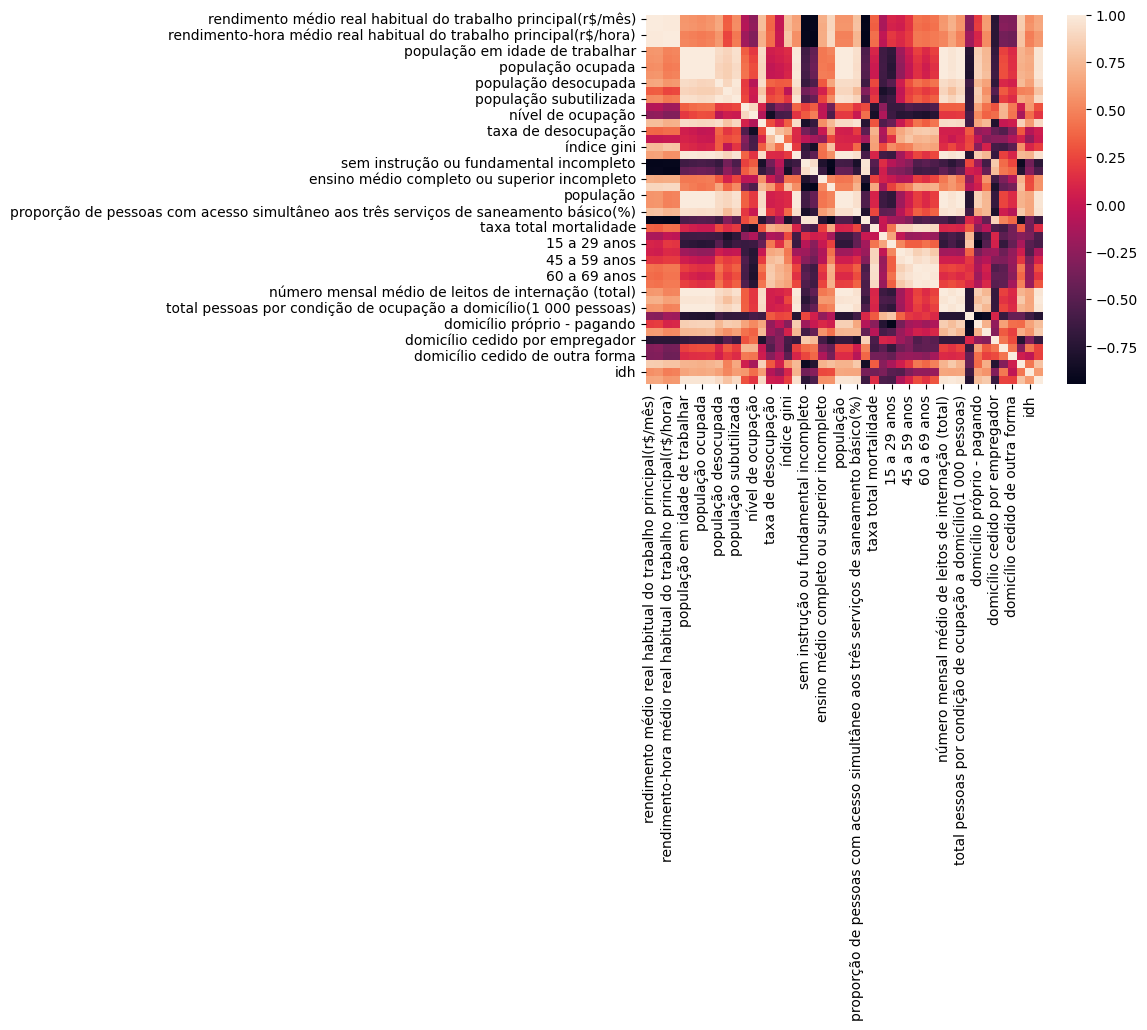

In [458]:
base_numeric = database.select_dtypes(include=['number'])
sns.heatmap(base_numeric.corr())

## Análise de Matrizes Específicas da Base